In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./data/ControllerData-ver0.6.csv')
df.shape


(2378, 5)

In [3]:
df.sample(10)

,x,y,rx,ry,type
1367,0.075903,-0.222121,-0.018845,-0.085283,0
1277,-0.017330,0.483509,-1.000000,0.050969,1
1589,0.110024,0.345416,0.006485,0.057816,0
317,0.134559,0.458086,-0.776250,-0.593917,1
2105,0.009963,-0.263542,-0.979526,0.208490,1
298,0.149512,0.120640,-0.459968,0.771950,1
1455,-0.273762,0.028494,-0.411693,-0.208918,1
2268,-0.088646,-0.455445,-0.756902,0.830777,1
1428,-0.107831,-0.286951,-0.019584,0.114631,0
1341,-0.032007,-0.506801,-0.678795,0.612539,1


In [4]:
df.dropna(axis=0, how='any')

,x,y,rx,ry,type
0,0.187561,0.207756,0.057475,0.000381,0
1,-0.088399,-0.470748,-0.418196,-0.490245,1
2,0.091014,0.566188,-0.035721,0.298834,1
3,-0.438049,-0.225483,0.284041,0.863913,1
4,-0.006805,0.663217,-0.090068,-0.156803,1
...,...,...,...,...,...
2373,-0.002405,0.767290,0.001297,0.006294,1
2374,0.167220,0.504894,-0.972325,-0.145125,1
2375,0.081865,0.800006,-0.819878,-0.359995,1
2376,-0.080982,-0.506141,-0.798677,0.750027,1


In [5]:
df1 = df.copy()

In [6]:
df1 = df1.round(4)

In [7]:
df1 = df1.dropna(axis=0, how='any')


In [8]:
data_1 = df1.loc[df1['type'] == 1]
data_2 = df1.loc[df1['type'] == 0]
data_2.sample(20)

,x,y,rx,ry,type
1217,0.1141,0.2535,-0.3094,-0.3143,0
480,-0.0609,-0.2280,0.0259,0.0335,0
1970,0.0070,-0.3861,0.0223,0.0510,0
10,0.0055,0.6036,-0.0656,0.0889,0
1993,-0.0004,-0.2935,-0.0281,-0.0469,0
654,-0.1067,0.4502,-0.4364,-0.3174,0
2010,0.0739,0.2245,-0.1433,-0.1976,0
1856,-0.0115,-0.2623,-0.0801,0.0063,0
907,0.0085,0.2207,-0.2446,-0.4463,0
1557,0.0077,0.3883,0.0984,-0.0854,0


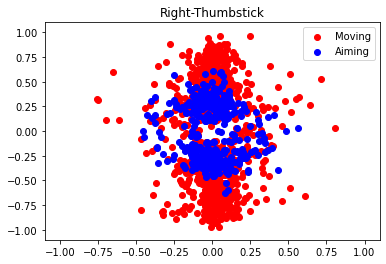

In [47]:
from cProfile import label
from turtle import color

X_data_1 = pd.DataFrame(data_1, columns=['x'])
Y_data_1 = pd.DataFrame(data_1, columns=['y'])
X_data_2 = pd.DataFrame(data_2, columns=['x'])
Y_data_2 = pd.DataFrame(data_2, columns=['y'])
plt.title("Right-Thumbstick")
plt.scatter(X_data_1[:1000], Y_data_1[:1000], color='red', label='Moving')
plt.scatter(X_data_2[:1000], Y_data_2[:1000], color='blue', label='Aiming')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend(loc='upper right')
plt.show()

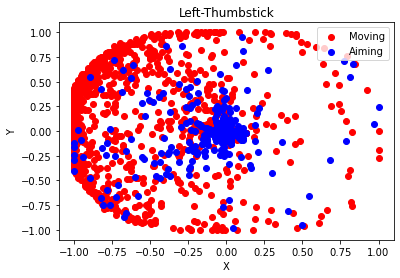

In [48]:
RX_data_1 = pd.DataFrame(data_1, columns=['rx'])
RY_data_1 = pd.DataFrame(data_1, columns=['ry'])
RX_data_2 = pd.DataFrame(data_2, columns=['rx'])
RY_data_2 = pd.DataFrame(data_2, columns=['ry'])
plt.title("Left-Thumbstick")
plt.scatter(RX_data_1[:1000], RY_data_1[:1000], color='red', label = 'Moving')
plt.scatter(RX_data_2[:1000], RY_data_2[:1000], color='blue', label = 'Aiming')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right')
plt.show()

In [11]:
df_X = df1.loc[:, ['x', 'y', 'rx', 'ry']]
df_y = df1.type

In [12]:
df_y

0       0
1       1
2       1
3       1
4       1
       ..
2373    1
2374    1
2375    1
2376    1
2377    1
Name: type, Length: 2378, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=123)

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.820527201346046
0.8252100840336134


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
  return Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('log_reg', LogisticRegression())
  ])

poly_log_reg = PolynomialLogisticRegression(2)
poly_log_reg.fit(X_train, y_train)
print(poly_log_reg.score(X_train, y_train))
print(poly_log_reg.score(X_test, y_test))

print('+++++++++++++++++')
y_predict = poly_log_reg.predict(X_test)
print("accuracy: ", accuracy_score(y_test, y_predict))
print("pricision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1: ",f1_score(y_test, y_predict))



0.8850252383623107
0.8957983193277311
+++++++++++++++++
accuracy:  0.8957983193277311
pricision:  0.9364161849710982
recall:  0.9436893203883495
f1:  0.9400386847195358


In [16]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss='hinge', penalty='elasticnet')
sgdc.fit(X_train, y_train)
print(sgdc.score(X_train, y_train))
print(sgdc.score(X_test, y_test))

0.8418395961862031
0.865546218487395


In [17]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))
print("+++++++++++++++++++++++++++++")
y_predict = svc.predict(X_test)
print("precision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1: ", f1_score(y_test, y_predict))

0.8850252383623107
0.880672268907563
+++++++++++++++++++++++++++++
precision:  0.9457831325301205
recall:  0.9145631067961165
f1:  0.9299111549851925


In [18]:
svc.intercept_

array([1.5673892])

In [19]:
import pickle
pickle.dump(svc, open('svc_model', 'wb'))

In [20]:
pickle.dump(log_reg, open('log_reg', 'wb'))

In [21]:
pickle.dump(poly_log_reg, open('poly_log_reg.pkl', 'wb'))

In [22]:
from joblib import dump
dump(poly_log_reg, 'poly_log_reg.joblib')

['poly_log_reg.joblib']

In [23]:
model = pickle.load(open('svc_model', 'rb'))
y = model.predict(X_test)
print("precision: ", precision_score(y_test, y))

precision:  0.9457831325301205


In [24]:
model.predict([["0.11008091156299298","0.40200244463407075","0.05479982724556556","-0.042620798716178306"]])


/Users/khalillee/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])